## Taylor expansion

In [11]:
# the required imports
import numpy as np
import sympy as sp
from math import factorial
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, IntSlider
from mpl_toolkits.mplot3d import Axes3D

_setup some helper functions_

In [3]:
# plot a symbolic function
def plotSymbFunc(f, labelText, range, steps, axes):
    xGrid   = np.linspace(range[0], range[1], steps)
    
    # compute the function values (y values)
    yValues = []
    for i in xGrid:
        yValues.append( f.subs(x, i) )
        
    axes.set_xlim(range[0], range[1]); axes.set_ylim(range[0], range[1])
    axes.spines['left'].set_position('zero'); axes.spines['bottom'].set_position('zero')
    axes.spines['right'].set_visible(False); axes.spines['top'].set_visible(False)
    axes.plot(xGrid, yValues, label=labelText)
    axes.legend()

### plot a function

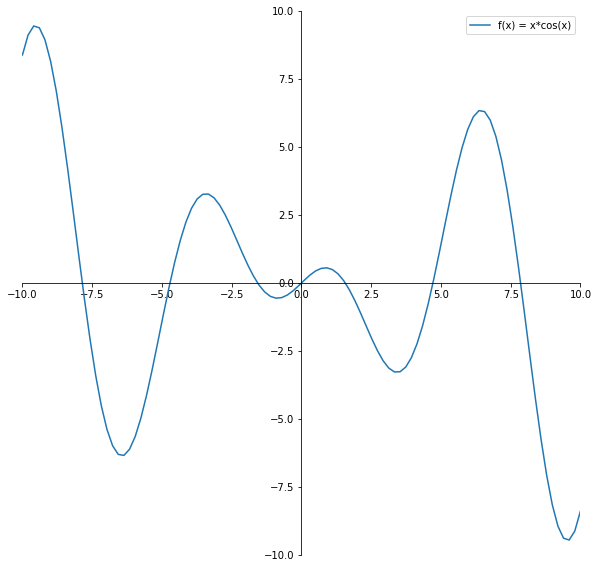

In [4]:
# plot f(x) = x*cos(x)
x = sp.Symbol('x')

def symbFuncXcosx(x):
    return x * sp.cos(x)

plt.figure(figsize=(10, 10))
plotSymbFunc(symbFuncXcosx(x), 'f(x) = x*cos(x)', [-10, 10], 100, plt.gca())
plt.show()

### compute the 1D Taylor approximation

In [5]:
# compute 1D Taylor approximation of f at x0
def taylor1D(f, x0, degree):
    result = 0  # initialize result to 0
    for i in range(degree):
        result += f.diff(x, i).subs(x, x0) / factorial(i) * (x - x0)**i
    return result

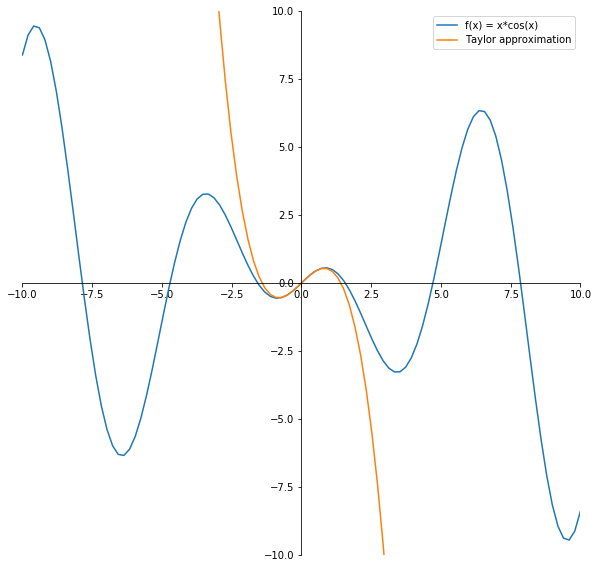

In [6]:
plt.figure(figsize=(10, 10))
plotSymbFunc(symbFuncXcosx(x), 'f(x) = x*cos(x)', [-10, 10], 100, plt.gca())
plotSymbFunc(taylor1D( symbFuncXcosx(x), 0, 5), 'Taylor approximation', [-10, 10], 100, plt.gca())
plt.show()

### let's do this interactively

In [7]:
# interactive taylor tool
def taylorTool(f, x0, degree):
    plt.figure(figsize=(10, 10))
    plotSymbFunc(f, 'f(x) = x*cos(x)', [-10, 10], 100, plt.gca())
    plotSymbFunc(taylor1D(f, x0, degree), 'Taylor approximation', [-10, 10], 100, plt.gca())
    plt.show()
    
iplot = interactive(taylorTool, f=fixed(symbFuncXcosx(x)), x0=fixed(0), \
                    degree=IntSlider(min=1, max=50, step=1, continuous_update=False))
iplot

interactive(children=(IntSlider(value=1, continuous_update=False, description='degree', max=50, min=1), Output…

### let's do Taylor with a 2D function

In [8]:
x = sp.Symbol('x')
y = sp.Symbol('y')

def symb2dFunc(x, y):
    return x * sp.cos( sp.sqrt(x**2 + y**2) )

def taylor2D(f, x0, y0, degree):
    if degree != 1 and degree != 2:
        return "this implementation of taylor2D can only do degree 1 or 2"
    
    result = f.subs(x, x0).subs(y, y0) + f.diff(x, 1).subs(x, x0).subs(y, y0) * (x - x0) \
              + f.diff(y, 1).subs(x, x0).subs(y, y0) * (y - y0)
    
    if degree == 1:
        return result
    elif degree == 2:
        return result + 0.5 * (f.diff(x, 2).subs(x, x0).subs(y, y0) * (x - x0)**2 \
                              + 2*f.diff(x, 1).diff(y, 1).subs(x, x0).subs(y, y0) * (x - x0) * (y - y0) \
                              + f.diff(y, 2).subs(x, x0).subs(y, y0) * (y-y0)**2 )

In [9]:
# plot a 2d symbolic function
def plotSymb2dFunc(f, range, steps, axes):
    xGrid   = np.linspace(range[0], range[1], steps)
    yGrid   = np.linspace(range[0], range[1], steps)
    xx, yy  = np.meshgrid(xGrid, yGrid)
    
    # compute the function values (z values)
    zValues = []
    for i in xGrid:
        for j in yGrid:
            zValues.append( f.subs(x, i).subs(y, j) )
    zValues = np.float64(np.asarray(zValues))
    
    axes.plot_surface(xx, yy, zValues.reshape(steps, steps), shade=True)

<IPython.core.display.Javascript object>


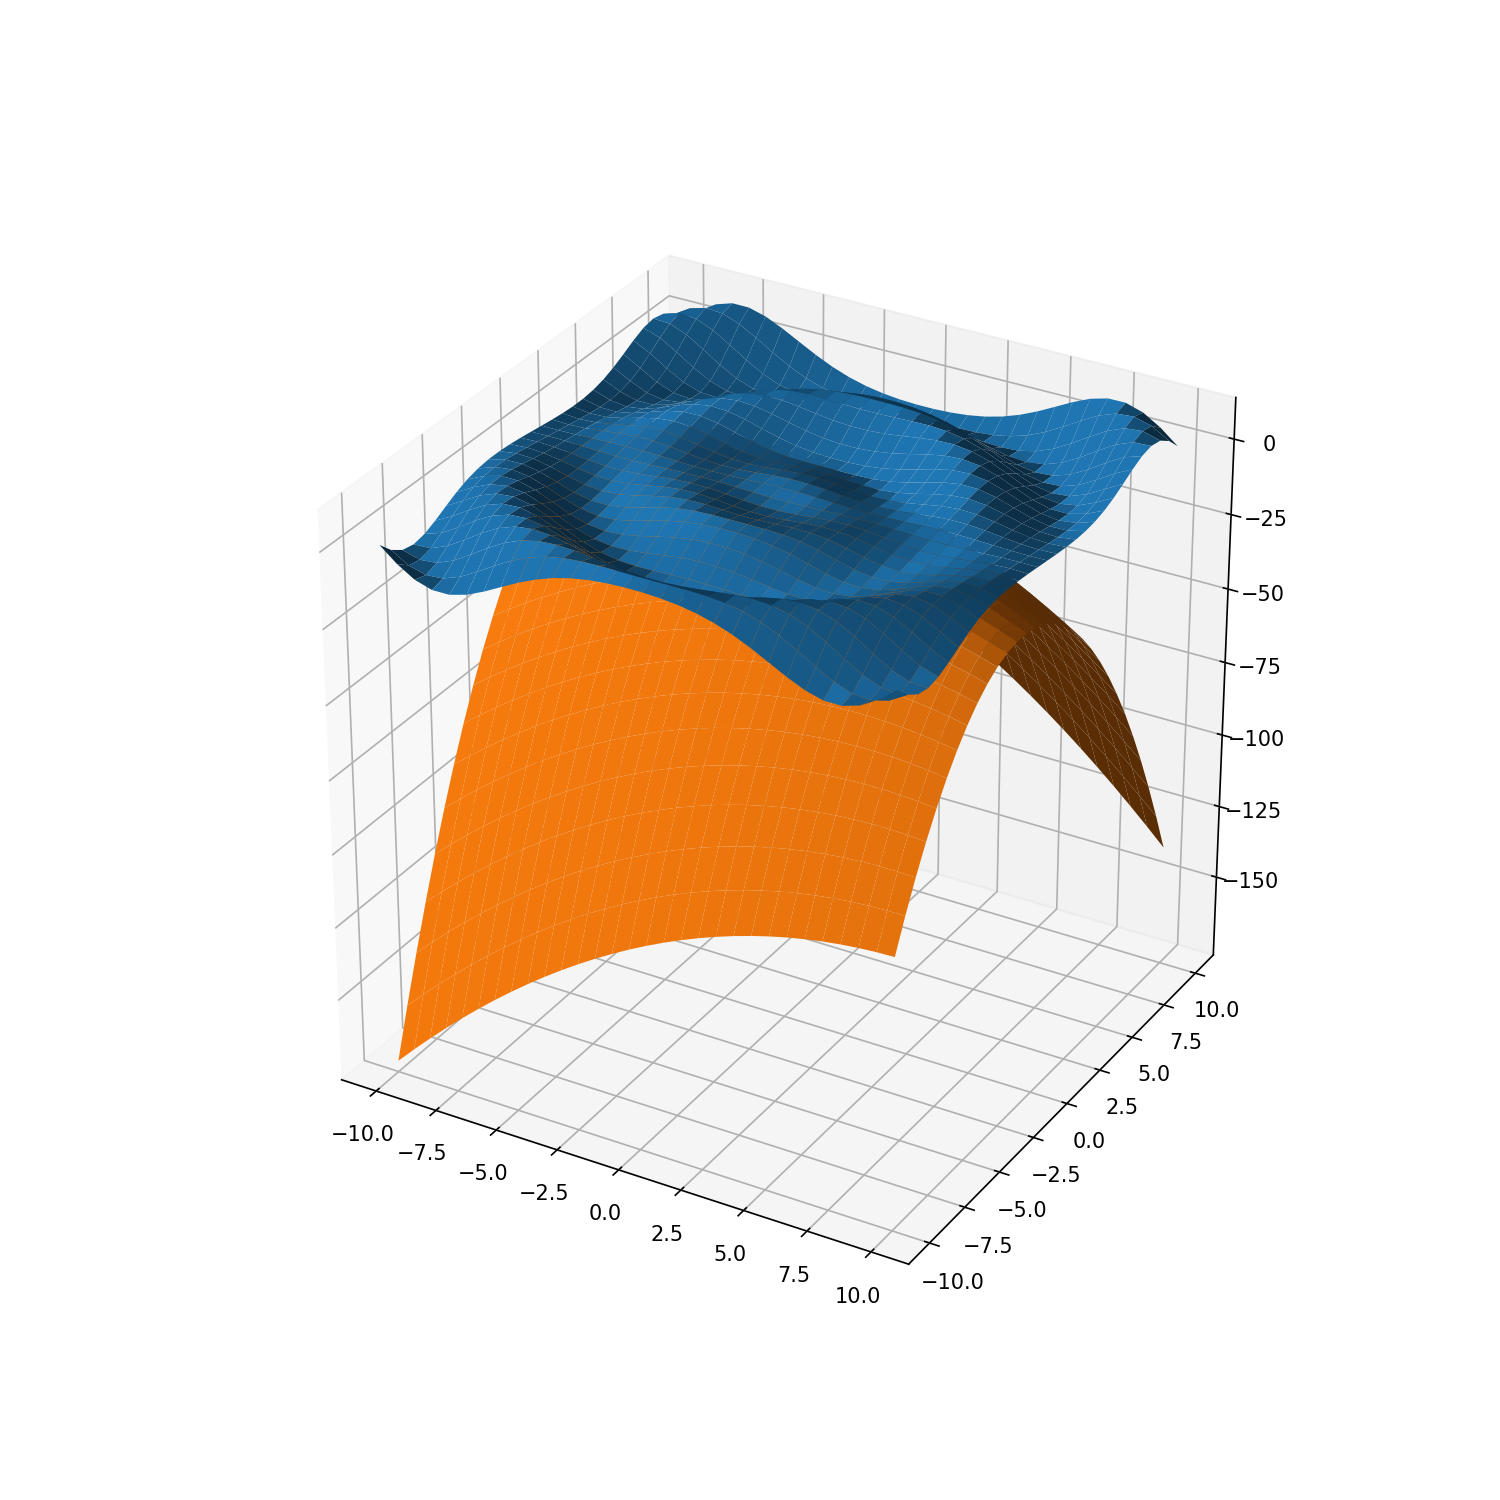

In [12]:
%matplotlib notebook

plt.figure(figsize=(10, 10))
plotSymb2dFunc(symb2dFunc(x, y), [-10, 10], 30, plt.gca(projection='3d'))
plotSymb2dFunc(taylor2D(symb2dFunc(x, y), 1, 1, 2) , [-10, 10], 30, plt.gca(projection='3d'))
plt.show()